In [21]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
data = pd.read_csv("Movie_regression.csv", header=0)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [24]:
mean_time = data['Time_taken'].mean()
data['Time_taken'].fillna(mean_time, inplace=True)
data = pd.get_dummies(data, drop_first=True)

In [25]:
X_data = data.drop(columns='Collection')
Y_data = data['Collection']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_actual = train_test_split(X_data, Y_data, train_size=0.85, random_state=42 )

# Standardise Data
## Mean of all variables = 0
## Variance of all variables = 1

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

In [28]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# SVM Regression

In [29]:
svm_reg = svm.SVR(kernel= 'linear', C=1000)
svm_reg.fit(X_train_std, Y_train)

SVR(C=1000, kernel='linear')

In [30]:
Y_pred_train = svm_reg.predict(X_train_std)
Y_pred_test = svm_reg.predict(X_test_std)

## Model Performance

In [31]:
mean_squared_error(Y_actual, Y_pred_test)

68926409.75852023

In [32]:
r2_score(Y_actual, Y_pred_test)

0.7384043725844868

In [33]:
import matplotlib.pyplot as plt

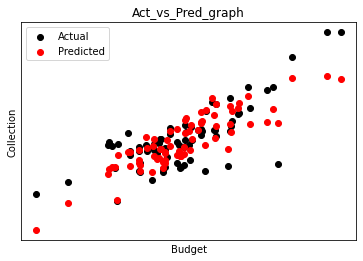

In [34]:
plt.scatter(
    x = X_test['Budget'],
    y = Y_actual,
    color = "black",
    label = 'Actual'
)
plt.scatter(
    X_test['Budget'],
    Y_pred_test,
    color = "red",
    label = 'Predicted'

)
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Collection')
plt.title('Act_vs_Pred_graph')
plt.xticks(())
plt.yticks(())
plt.savefig('Act_vs_Pred_graph.png')
plt.show()